In [1]:
import ROOT

Welcome to JupyROOT 6.22/02


# Load the histogram

In [2]:
f = ROOT.TFile("zpeakCutflow_1.root", "READ") # read the cut-flow root file
f.cd("demo")
h_RecDiMuonM = ROOT.TH1F()
h_RecDiMuonM_Scale = ROOT.TH1F()
h_RecDiMuonM = f.Get("demo/h_RecDiMuonM")

# Scale the histogram

In [3]:
scale = 59.74/97195
h_RecDiMuonM.Scale(scale) # normalize the histogram to 59.74 /fb

# Set Roofit

In [4]:
# set RooFit variables
x = ROOT.RooRealVar("x","m_{#mu^{+}#mu^{-}}",75,105)
m = ROOT.RooRealVar("m","m",91,88,92) # mean
s = ROOT.RooRealVar("s","s",3,0,10) # width or standard deviation

# for crystal ball function
a = ROOT.RooRealVar("a","a",0,5)
n = ROOT.RooRealVar("n","n",1,6)

# for Voigtian function
sv = ROOT.RooRealVar("sv","sv",0,0,2) # sigma in Voigtian

# for Bukin function
xi = ROOT.RooRealVar("xi","peak asymmetry",-0.3,-1,1)
rho1 = ROOT.RooRealVar("rho1","left tail",-0.5,-1,0)
rho2 = ROOT.RooRealVar("rho2","right tail",0.4,0,1)

# load the histogram
ral = ROOT.RooArgList(x) # this line must be added in pyroot
h = ROOT.RooDataHist("h","Mass of dimuon",ral,ROOT.RooFit.Import(h_RecDiMuonM))

# set fit function 
#func = ROOT.RooCBShape("func","func",x,m,s,a,n) # crystal ball function
#func = ROOT.RooGaussian("func","func",x,m,s)
#func = ROOT.RooBreitWigner("func","func",x,m,s)
func = ROOT.RooVoigtian("func","func",x,m,s,sv)
#func = ROOT.RooBukinPdf("func","func",x,m,s,xi,rho1,rho2)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



# Fit the histogram

In [5]:
# fit
func.fitTo(h)
#func.fitTo(h,ROOT.RooFit.Range(80,100)) # fit in peak range

c = ROOT.TCanvas("c","c",1000,600)

xframe = x.frame()

h.plotOn(xframe)
func.plotOn(xframe)

xframe.Draw()

c.SaveAs("fit.pdf")

[#0] WARNING:InputArguments -- RooAbsPdf::fitTo(func) WARNING: a likelihood fit is requested of what appears to be weighted data.
       While the estimated values of the parameters will always be calculated taking the weights into account,
       there are multiple ways to estimate the errors of the parameters. You are advised to make an 
       explicit choice for the error calculation:
           - Either provide SumW2Error(true), to calculate a sum-of-weights-corrected HESSE error matrix
             (error will be proportional to the number of events in MC).
           - Or provide SumW2Error(false), to return errors from original HESSE error matrix
             (which will be proportional to the sum of the weights, i.e., a dataset with <sum of weights> events).
           - Or provide AsymptoticError(true), to use the asymptotically correct expression
             (for details see https://arxiv.org/abs/1911.01303).
[#1] INFO:NumericIntegration -- RooRealIntegral::init(func_Int[x]

Info in <TCanvas::Print>: pdf file fit.pdf has been created


# Output the fitting result

Chi-square:  RooChi2Var::chi2[ paramSet=(m,s,sv) ] = 12403.1

RooRealVar::m = 90.8351 +/- 0.127733  L(88 - 92) 
[#1] INFO:NumericIntegration -- RooRealIntegral::init(func_Int[x]) using numeric integrator RooIntegrator1D to calculate Int(x)


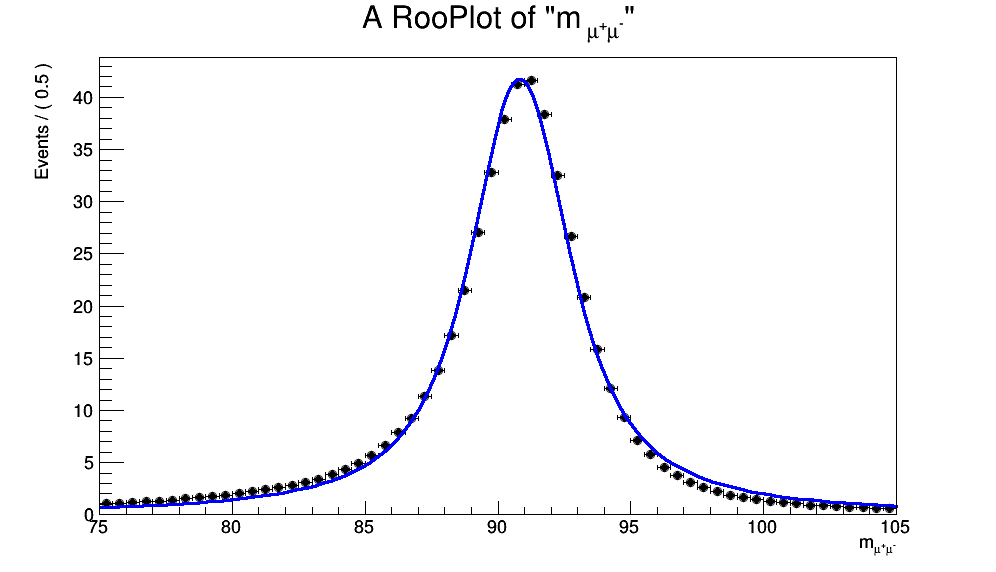

In [7]:
c.Draw()
m.Print()
chi2 = ROOT.RooChi2Var("chi2","chi2",func,h)
print("Chi-square: ",chi2)